In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
#Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.
df=pd.read_csv("fcc-forum-pageviews.csv",parse_dates=["date"],index_col="date")

In [4]:
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [6]:
df.describe()

,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


In [7]:
df=df[(df[("value")]>=df["value"].quantile(0.025)) &(df[("value")]<=df["value"].quantile(0.975))]

In [10]:
#Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png".
#The label on the x axis should be Date and the label on the y axis should be Page Views.
def draw_line_plot():
    fig, ax = plt.subplots(figsize = (32, 10), dpi = 100)
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")
    sns.lineplot( data = df, legend = False, palette = ['r'])
    fig.savefig('line-plot.png')
    

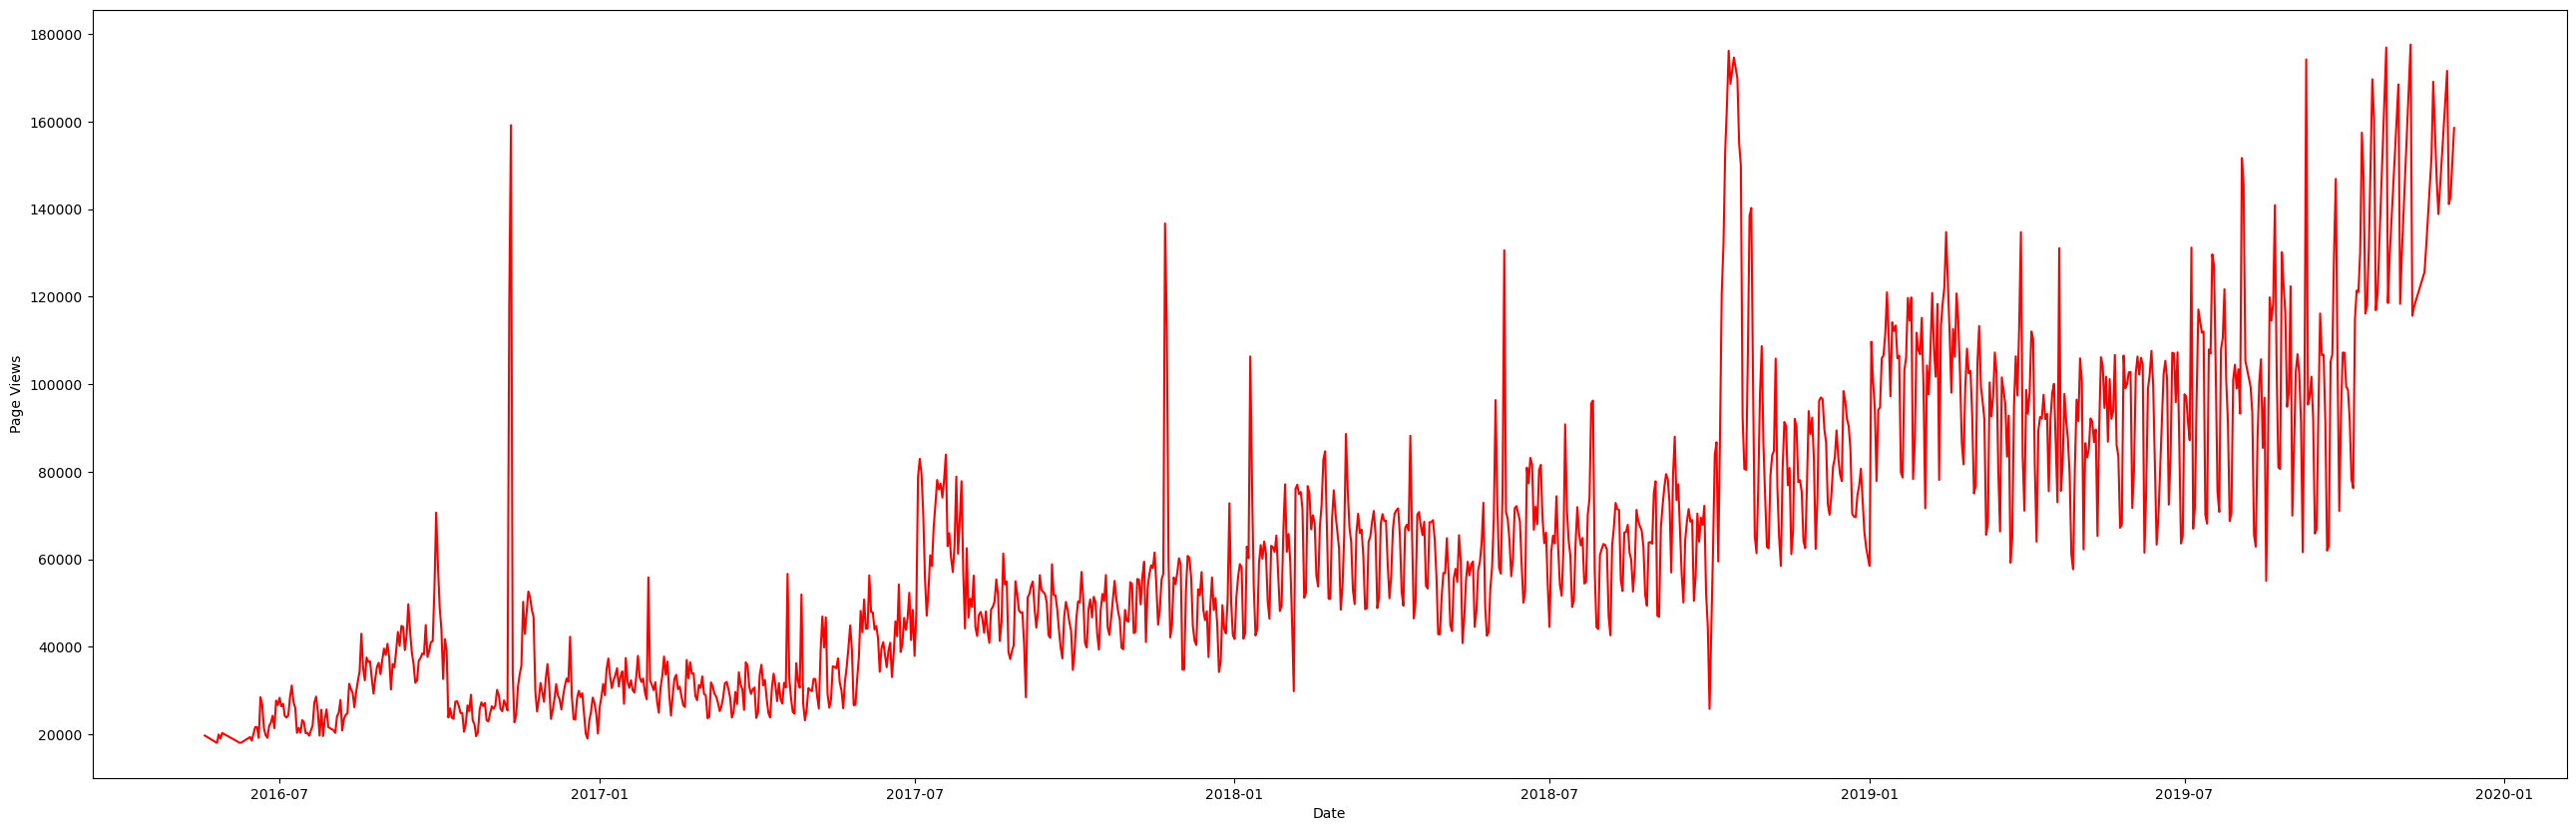

In [11]:

draw_line_plot()

In [16]:
#Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". 
#It should show average daily page views for each month grouped by year. 
#The legend should show month labels and have a title of Months. 
#On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views. 
def draw_bar_plot():
    df_bar = df.copy()
    df_bar['year'] =df_bar.index.year
    df_bar['month'] = df_bar.index.month
    df_bar = df_bar.groupby (['year','month'])['value'].mean()
    df_bar = df_bar.unstack()
    df_bar.columns = ['January', 'February', 'March','April', 'May', 'June', 'July', 'August','September', 'October', 'November','December']
    fig =df_bar.plot(kind = 'bar', figsize = (15,10)).figure
    plt.xlabel ('Years', fontsize = 15)
    plt.ylabel( 'Average Page Views', fontsize = 15)
    plt.legend(loc = 'upper left', title = 'Months', fontsize = 15)
    fig.savefig('bar_plot.png')
    

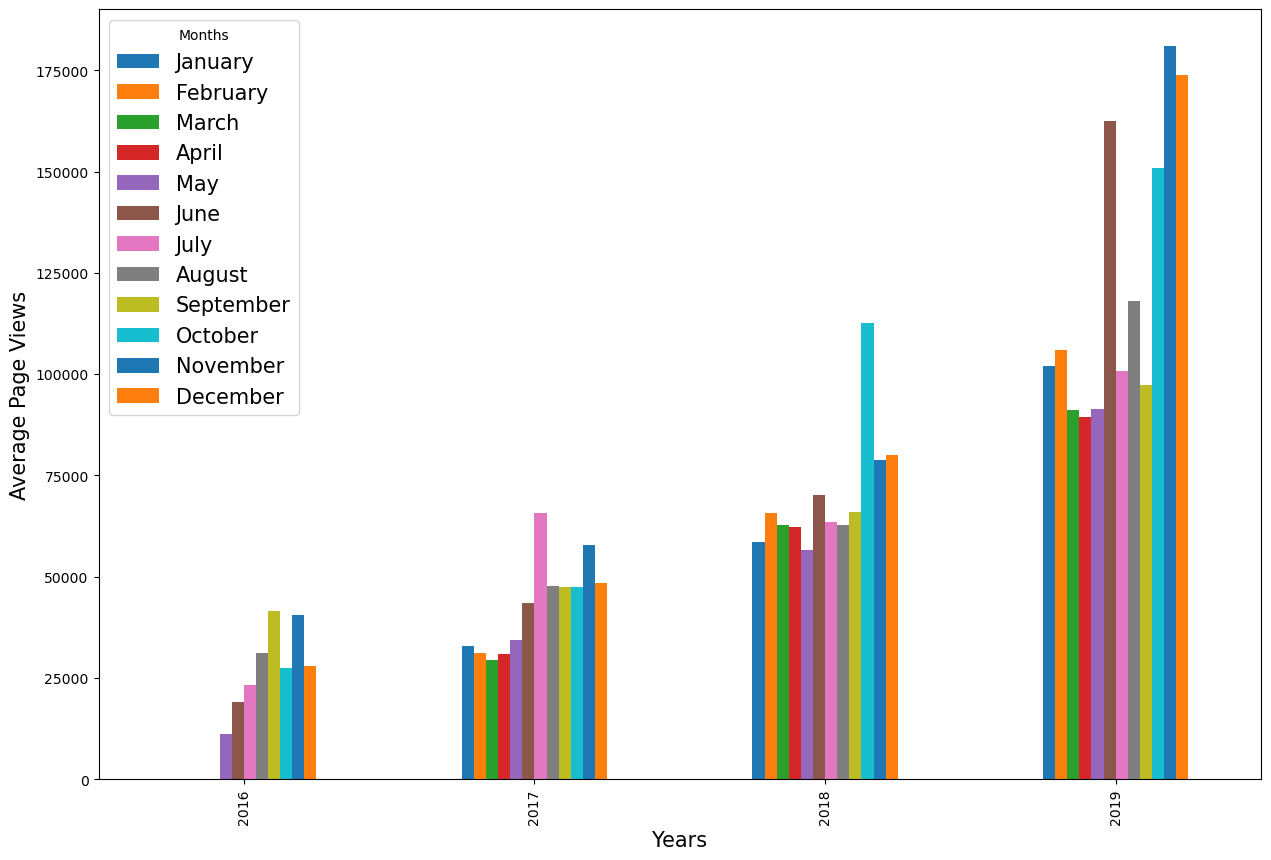

In [18]:
draw_bar_plot()

In [23]:
#Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png".
#These box plots should show how the values are distributed within a given year or month and how it compares over time.
#The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise 
#Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. 
#The boilerplate includes commands to prepare the data.
def draw_box_plot():
    df_box = df.copy()
    df_box.reset_index(inplace = True)
    df_box['year']=[d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    fig, (ax1, ax2) =plt.subplots (1,2, figsize = (16,8))
    sns. boxplot (data=df_box, ax = ax1, x ='year' ,y = 'value')
    ax1.set_title("Year-wise BoX Plot (Trends)")
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Page Views")
    sns.boxplot (data=df_box, ax = ax1, x = 'month' , y = 'value' )
    ax1.set_title("Month-wise Box Plot (Seasonality)")
    ax1.set_xlabel("'Month" )
    ax1.set_ylabel("Page Views")
    fig.savefig('bar_plot.png')


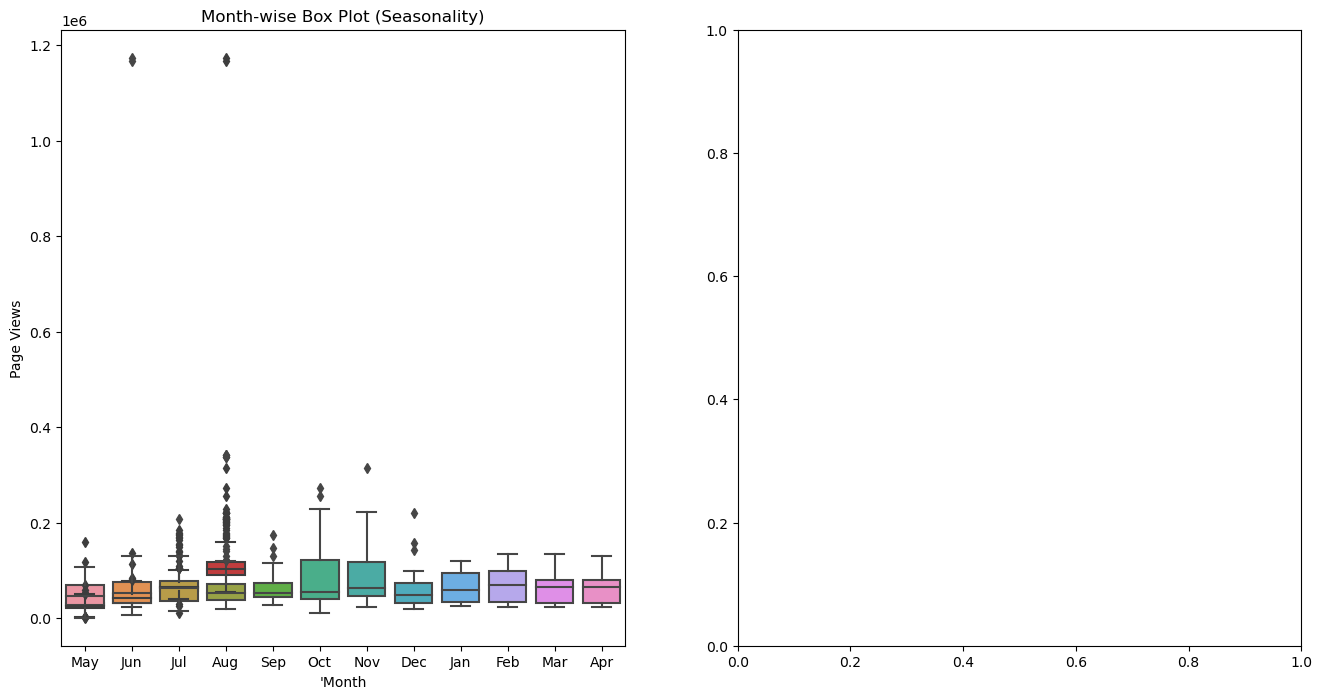

In [24]:
draw_box_plot()